In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# Load the dataset
data = pd.read_csv('Housing.csv')
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [3]:
# Select relevant features and target variable
# Separate input features and target variable
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = data['price']

# Add a column of ones to X for the intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history

In [5]:
alpha = 0.1  # Learning rate
iterations = 1500  # Number of iterations

# Initialize theta
theta = np.zeros(X_train.shape[1])

# Perform gradient descent
theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, iterations)

# Compute validation cost
val_cost_history = np.zeros(iterations)
for i in range(iterations):
    val_cost_history[i] = compute_cost(X_val, y_val, theta)

# Best parameters (theta)
print("Best parameters (theta):", theta)


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_1895/2295497498.py:17: RuntimeWarning: invalid value encountered in subtract
  theta = theta - sum_delta;


Best parameters (theta): [nan nan nan nan nan nan]


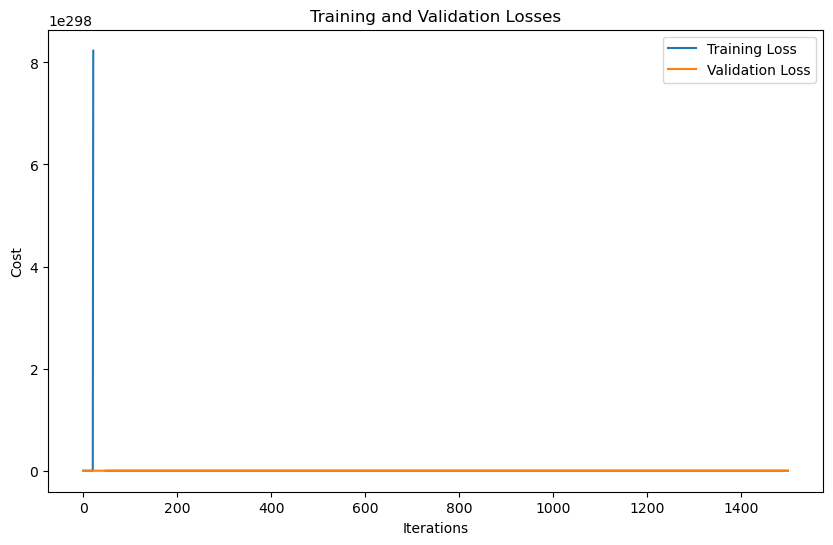

In [6]:
# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, label='Training Loss')
plt.plot(range(iterations), val_cost_history, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()


In [7]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
data[categorical_features] = data[categorical_features].replace({'yes':1,'no':0})
#Source: https://www.geeksforgeeks.org/replace-the-column-contains-the-values-yes-and-no-with-true-and-false-in-python-pandas/#
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
            'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X = data[features]
y = data['price']


In [9]:
# Add a column of ones to X for the intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
alpha = 0.05  # Learning rate
iterations = 1500  # Number of iterations

# Initialize theta
theta = np.zeros(X_train.shape[1])

# Perform gradient descent
theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, iterations)

# Compute validation cost
val_cost_history = np.zeros(iterations)
for i in range(iterations):
    val_cost_history[i] = compute_cost(X_val, y_val, theta)

# Best parameters (theta)
print("Best parameters (theta):", theta)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_1895/2295497498.py:17: RuntimeWarning: invalid value encountered in subtract
  theta = theta - sum_delta;


Best parameters (theta): [nan nan nan nan nan nan nan nan nan nan nan nan]


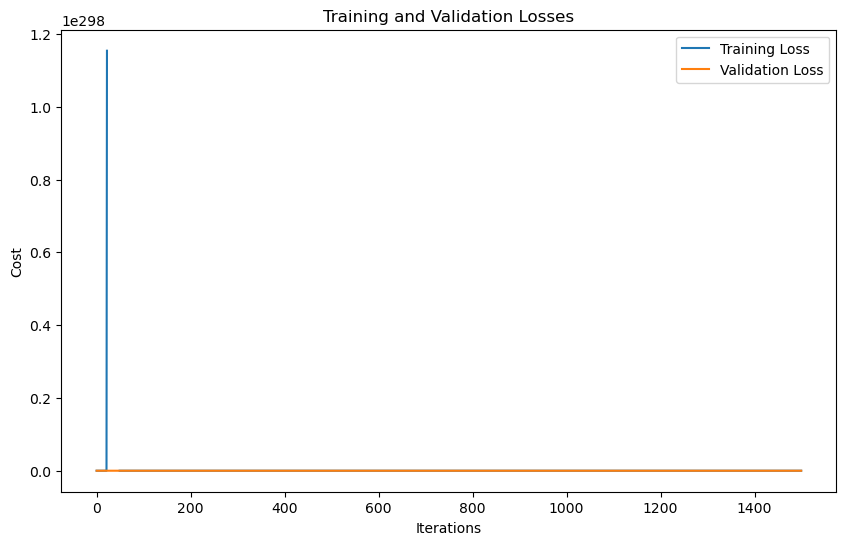

In [11]:
# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, label='Training Loss')
plt.plot(range(iterations), val_cost_history, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

In [12]:
# Select relevant features and target variable
# Separate input features and target variable
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = data['price']

# Add a column of ones to X for the intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Normalize the data (feature scaling)
scaler_X = MinMaxScaler()
normalized_X = scaler_X.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(normalized_X, y, test_size=0.2, random_state=42)

In [13]:
alpha = 0.05  # Learning rate
iterations = 1500  # Number of iterations

# Initialize theta
theta = np.zeros(X_train.shape[1])

# Perform gradient descent
theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, iterations)

# Compute validation cost
val_cost_history = np.zeros(iterations)
for i in range(iterations):
    val_cost_history[i] = compute_cost(X_val, y_val, theta)

# Best parameters (theta)
print("Best parameters (theta):", theta)

Best parameters (theta): [      0.         5887532.11155406 5518870.83116156 2091145.51204375
 1495704.26507559 1332214.46010349]


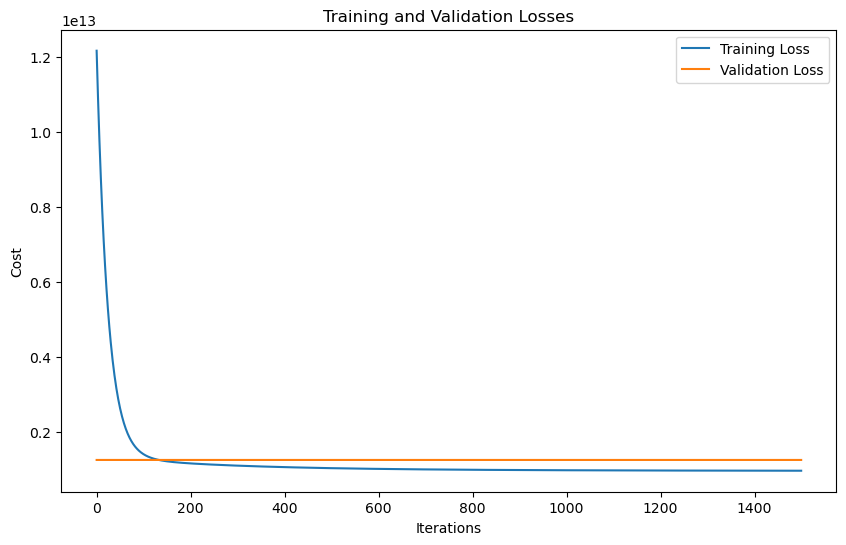

In [14]:
# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, label='Training Loss')
plt.plot(range(iterations), val_cost_history, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

In [15]:
# Select relevant features and target variable
# Separate input features and target variable
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = data['price']

# Add a column of ones to X for the intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Normalize the data (feature scaling)
scaler_X = StandardScaler()
standardized_X = scaler_X.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(standardized_X, y, test_size=0.2, random_state=42)

In [16]:
alpha = 0.05  # Learning rate
iterations = 1500  # Number of iterations

# Initialize theta
theta = np.zeros(X_train.shape[1])

# Perform gradient descent
theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, iterations)

# Compute validation cost
val_cost_history = np.zeros(iterations)
for i in range(iterations):
    val_cost_history[i] = compute_cost(X_val, y_val, theta)

# Best parameters (theta)
print("Best parameters (theta):", theta)

Best parameters (theta): [     0.         721752.75766949 184748.10923987 380497.66235316
 330829.11006476 263373.64161593]


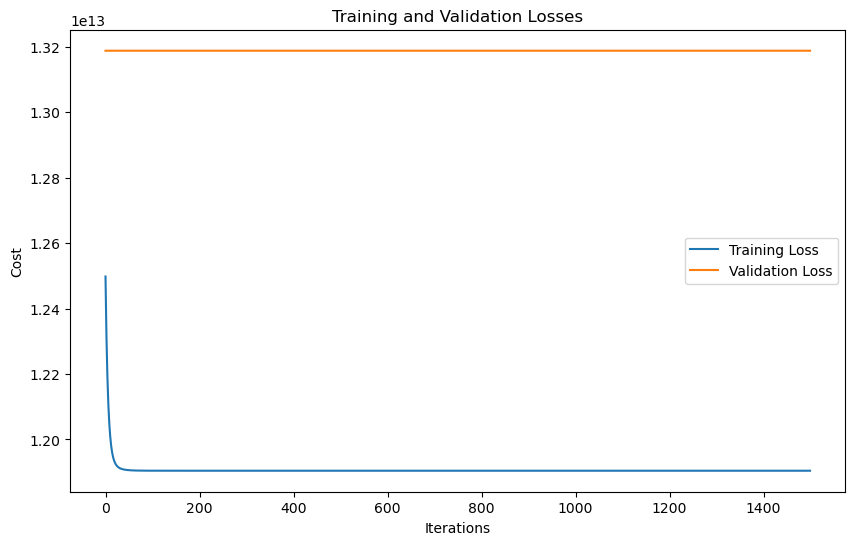

In [17]:
# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, label='Training Loss')
plt.plot(range(iterations), val_cost_history, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()